# INFORMATION TO USER
The notebook is used to generate Figure 2 in the manuscript via the **Google Colab** platform


# Package Versions
Imported Libraries
- numpy: 1.18.5
- pandas: 1.0.5
- seaborn: 0.10.1
- matplotlib: 3.2.2

### Clone GitHub Repository
This is so we can access the raw data in the \*.csv files from the GitHib at https://github.com/oliver29063/MalariaDiagnosis.

In [3]:
! git clone https://github.com/oliver29063/MalariaDiagnosis

Cloning into 'MalariaDiagnosis'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 1128 (delta 33), reused 0 (delta 0), pack-reused 1055
Receiving objects: 100% (1128/1128), 4.57 MiB | 2.43 MiB/s, done.
Resolving deltas: 100% (329/329), done.


### Import Packages and Set Plot Specifications

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.set_style(style='whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Convolution Figures (Figures 2A and 2B)

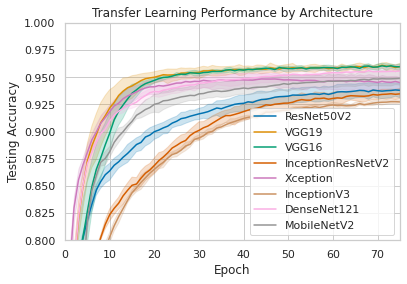

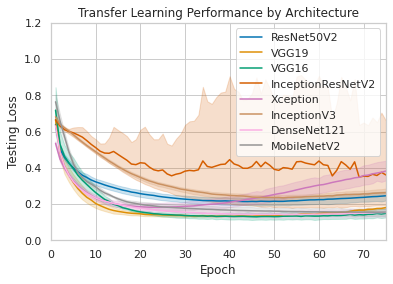

In [4]:
ModelList = ['ResNet50V2', 'VGG19', 'VGG16', 'InceptionResNetV2', 'Xception', 'InceptionV3','DenseNet121','MobileNetV2']

# Initialize variables and preallocate memory space
Epochs = 75
ModelCt = len(ModelList)
TestAccuracies = np.zeros([5*ModelCt,75])
TestLosses = np.zeros([5*ModelCt,75])

# Import CSV data from feature extraction architecture experiments
for i in range(ModelCt):
    TestAccuracies[i*5:(i+1)*5,:] = np.genfromtxt('MalariaDiagnosis/ArchitectureResults/'+str(ModelList[i])+'_TestAcc.csv', delimiter=',')
    TestLosses[i*5:(i+1)*5,:] = np.genfromtxt('MalariaDiagnosis/ArchitectureResults/'+str(ModelList[i])+'_TestLoss.csv', delimiter=',')
    
# Flatten or concatenate data for dataframe
All_Accuracies = TestAccuracies.flatten()
All_Losses = TestLosses.flatten()
Epochs = np.array(list(np.arange(1,Epochs+1))*5*ModelCt)
Models = np.repeat(ModelList, [375]*ModelCt, axis=0)

# Set up DataFrame for testing accuracy and testing loss
AccuracyPerformanceData = {'Epoch': Epochs, 'Testing Accuracy': All_Accuracies, 'Model': Models}
AccuracyPerformanceDf = pd.DataFrame(data=AccuracyPerformanceData)

LossPerformanceData = {'Epoch': Epochs, 'Testing Loss': All_Losses, 'Model': Models}
LossPerformanceDf = pd.DataFrame(data=AccuracyPerformanceData)
                              
# Print plots 
plt.figure(1)
AccuracyPerformancePlt = sns.lineplot(x="Epoch", y="Testing Accuracy", hue="Model", data=AccuracyPerformanceData, palette="colorblind")
plt.title('Transfer Learning Performance by Architecture')
plt.ylabel('Testing Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.8,1)
plt.xlim(0,75)
plt.savefig('Figure2A.png', dpi = 600)
plt.show()

plt.figure(3)
LossPerformancePlt = sns.lineplot(x="Epoch", y="Testing Loss", hue="Model", data=LossPerformanceData, palette="colorblind")
plt.title('Transfer Learning Performance by Architecture')
plt.ylabel('Testing Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.ylim(0,1.2)
plt.xlim(0,75)
plt.savefig('Figure2B.png', dpi = 600)
plt.show()